<a href="https://colab.research.google.com/github/nekroz-coder/MachineLearning/blob/main/week4/data_Visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Ganti 'nama_file.csv' dengan nama berkas CSV yang ingin Anda baca
nama_file = '/content/drive/MyDrive/Dataset/diamonds.csv'

# Membaca berkas CSV menjadi DataFrame
df = pd.read_csv(nama_file)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())


   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [38]:
# Tampilkan jumlah nilai unik untuk setiap fitur
unique_value_counts = df.nunique()
print(unique_value_counts)

Unnamed: 0            53940
carat                   273
cut                       5
color                     7
clarity                   8
depth                   184
table                   127
price                 11602
x                       554
y                       552
z                       375
numerical_category        2
dtype: int64


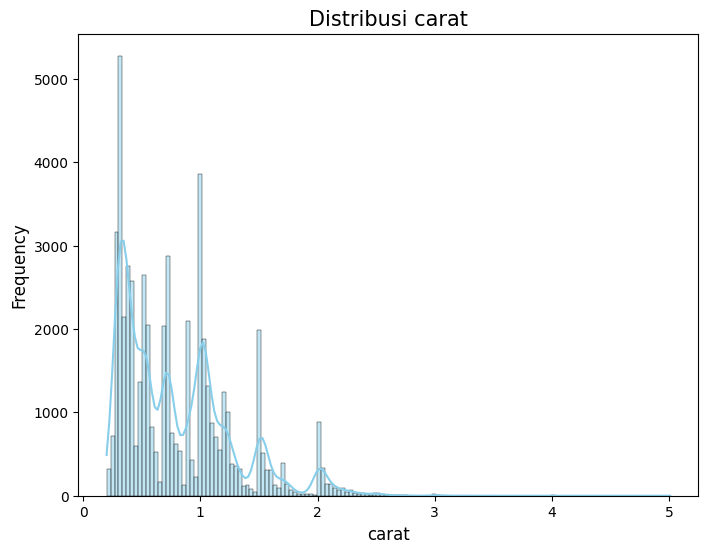

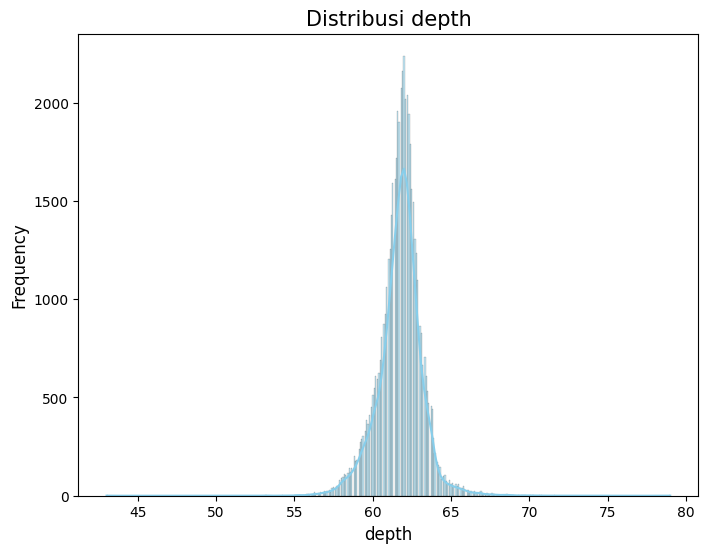

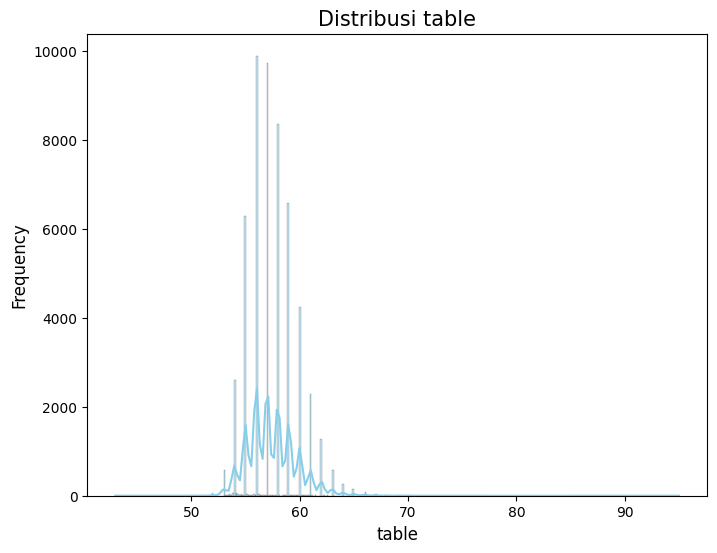

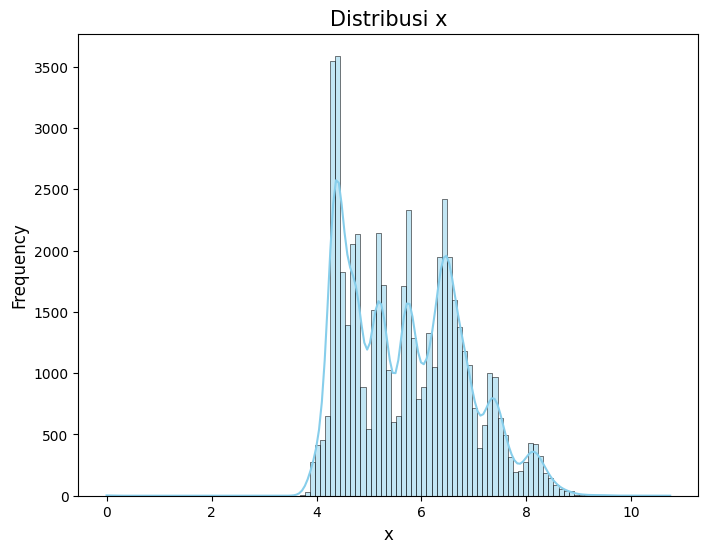

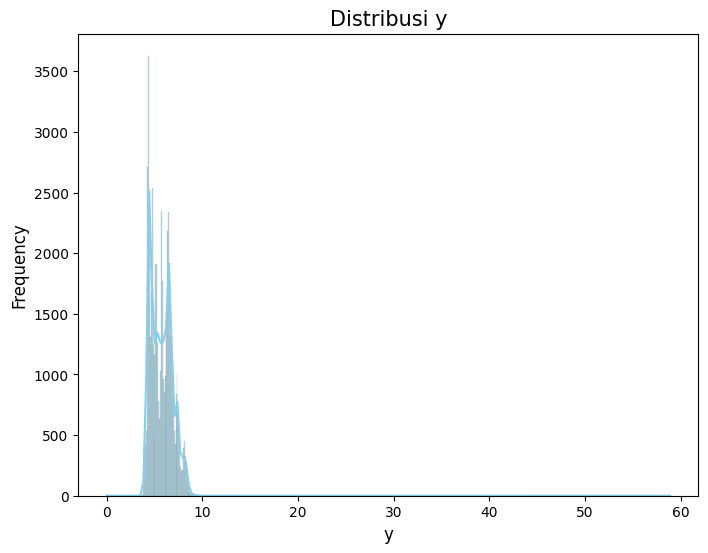

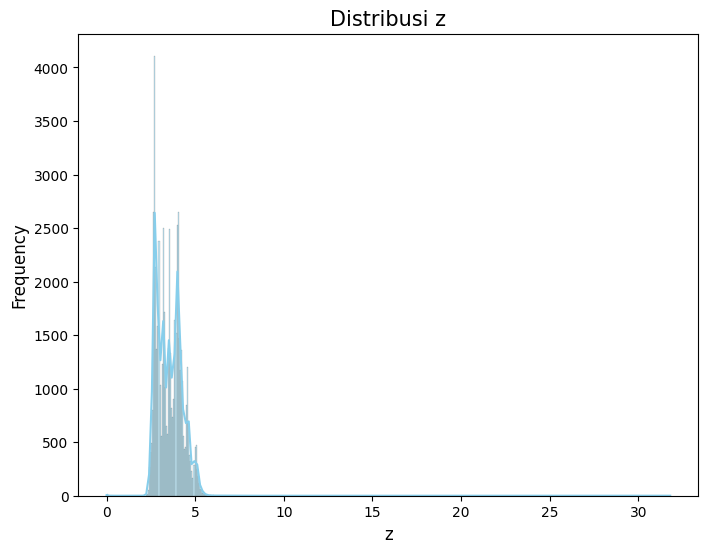

In [37]:
# Visualisasi distribusi untuk setiap fitur
for column in df.columns:
    if df[column].dtype == 'float64':
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, color='skyblue')
        plt.title(f'Distribusi {column}', size=15)
        plt.xlabel(column, size=12)
        plt.ylabel('Frequency', size=12)
        plt.show()

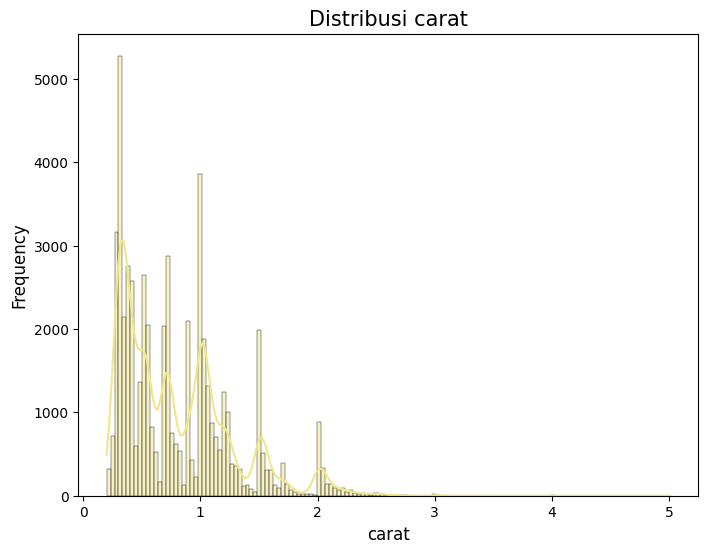

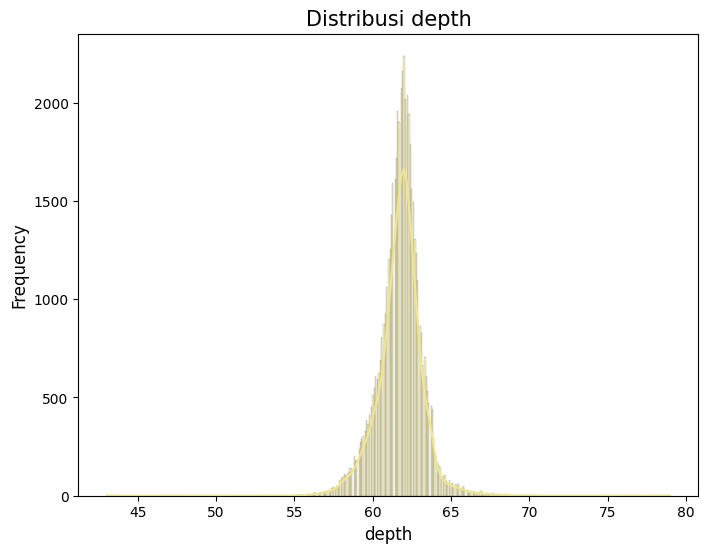

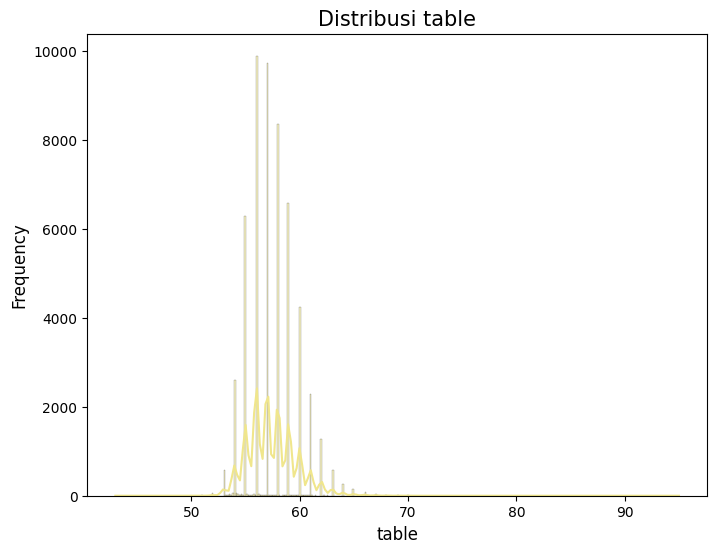

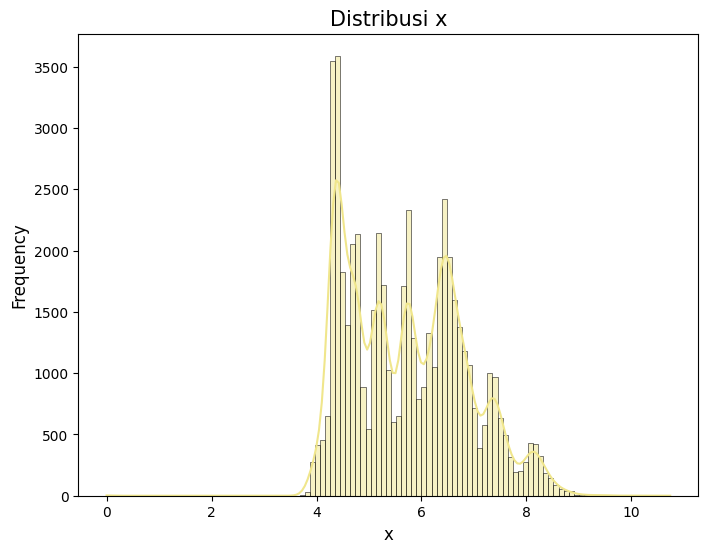

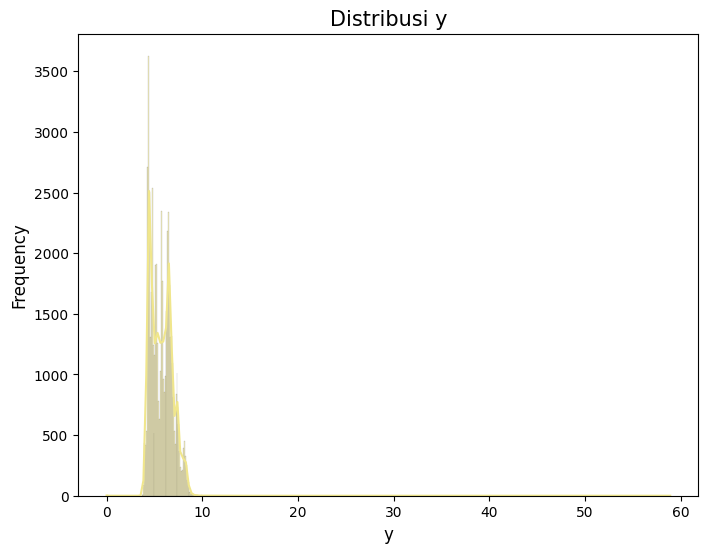

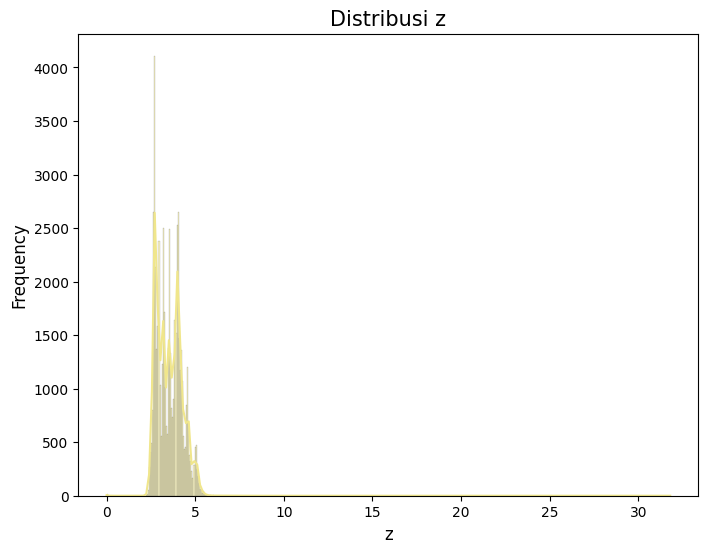

In [39]:
# Visualisasi distribusi untuk setiap fitur
for column in df.columns:
    if df[column].dtype == 'float64':
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, color='khaki')
        plt.title(f'Distribusi {column}', size=15)
        plt.xlabel(column, size=12)
        plt.ylabel('Frequency', size=12)
        plt.show()

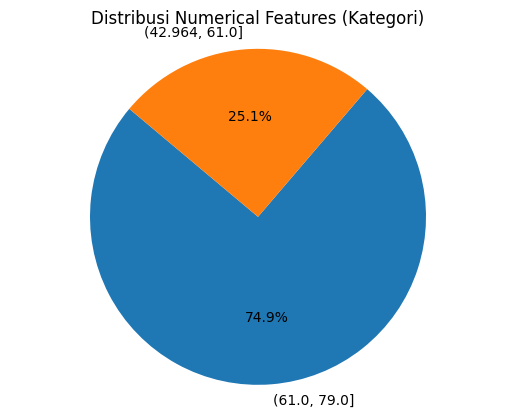

In [35]:
# Daftar numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Mengubah numerical features menjadi kategori
df['numerical_category'] = pd.cut(df['carat'], bins=2)  # Contoh untuk 'carat'
df['numerical_category'] = pd.cut(df['depth'], bins=2)

# Hitung frekuensi setiap kategori
numerical_category_counts = df['numerical_category'].value_counts()

# Membuat pie chart
plt.pie(numerical_category_counts, labels=numerical_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Mengatur aspek rasio agar bulat

plt.title('Distribusi Numerical Features (Kategori)')

plt.show()

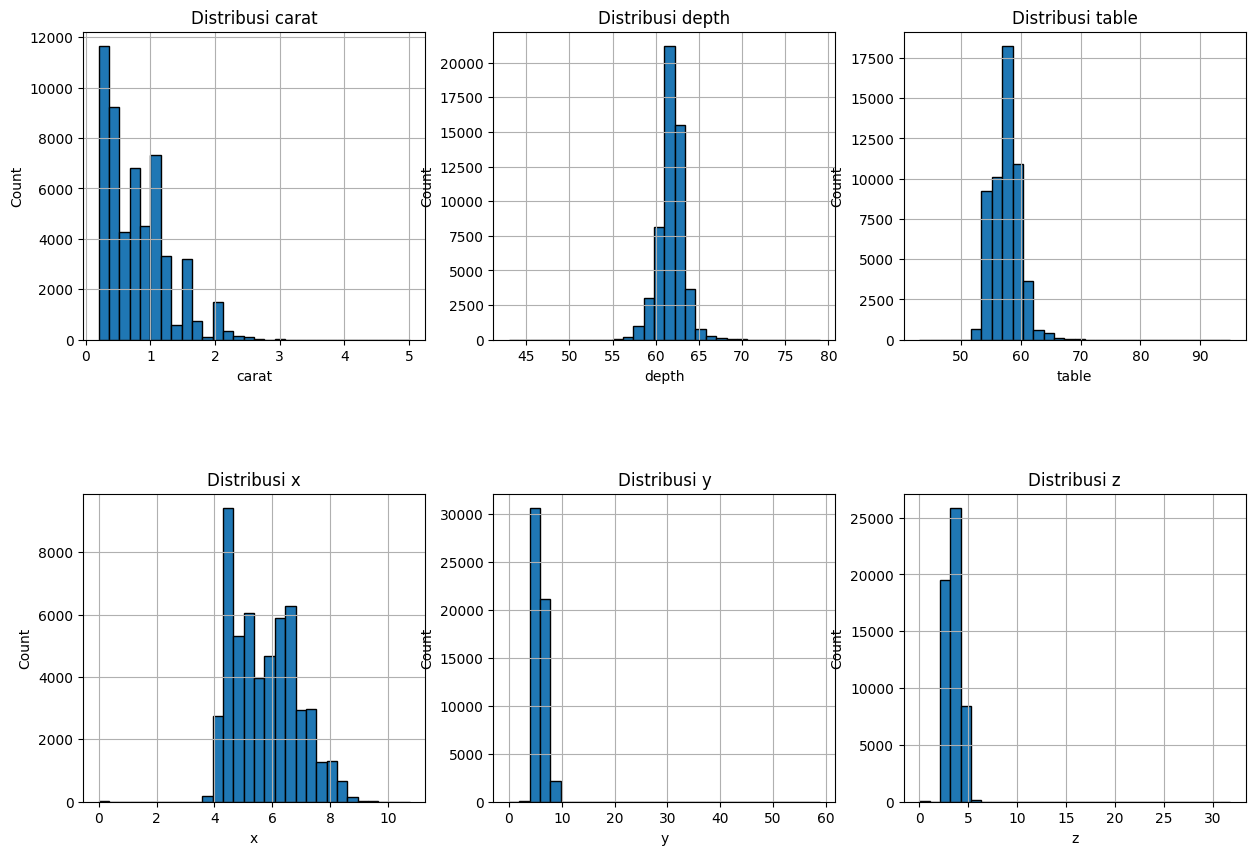

In [22]:
# Daftar numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Membuat subplot dengan 2 baris dan 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 3)
    ax = axes[row, col]

    # Menampilkan distribusi menggunakan histogram
    df[feature].hist(ax=ax, bins=30, edgecolor='k')

    ax.set_title(f'Distribusi {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.show()

In [43]:
# Daftar numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Fungsi untuk menampilkan box plot dengan lebar bin interaktif
def plot_box_plot(bin_width=1.0):
    # Membuat subplot dengan 2 baris dan 3 kolom
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.5)

    for i, feature in enumerate(numerical_features):
        row, col = divmod(i, 3)
        ax = axes[row, col]

        # Membuat box plot menggunakan Seaborn dengan lebar bin yang disesuaikan
        sns.histplot(x=df[feature], binwidth=bin_width, kde=True, ax=ax)

        ax.set_title(f'Distribusi {feature}')
        ax.set_xlabel(feature)

    plt.show()

# Menggunakan widget untuk mengontrol lebar bin secara interaktif
bin_width_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=10.0,
    step=0.1,
    description='Bin Width:'
)

interact(plot_box_plot, bin_width=bin_width_slider)

interactive(children=(FloatSlider(value=1.0, description='Bin Width:', max=10.0, min=0.1), Output()), _dom_cla…

<function __main__.plot_box_plot(bin_width=1.0)>

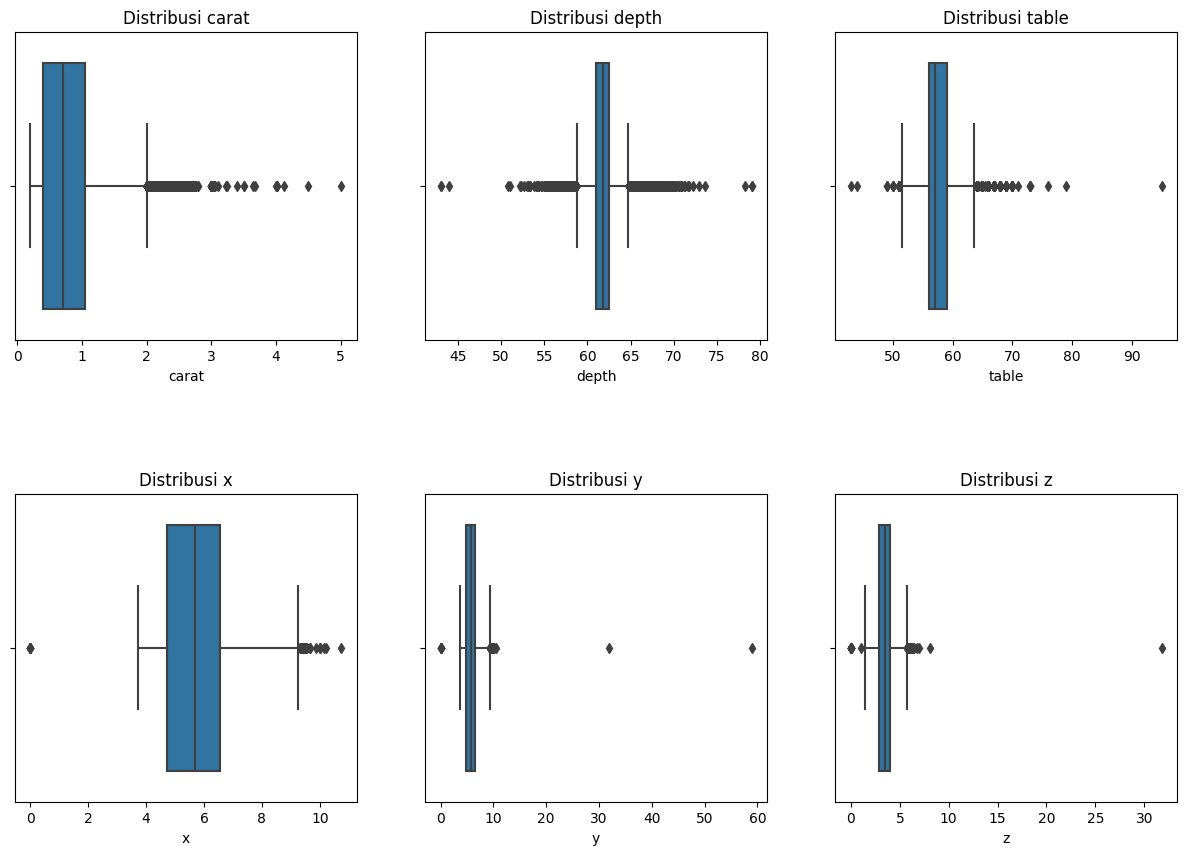

In [36]:
# Daftar numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Membuat subplot dengan 2 baris dan 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 3)
    ax = axes[row, col]

    # Membuat box plot menggunakan Seaborn
    sns.boxplot(x=df[feature], ax=ax)

    ax.set_title(f'Distribusi {feature}')
    ax.set_xlabel(feature)

plt.show()

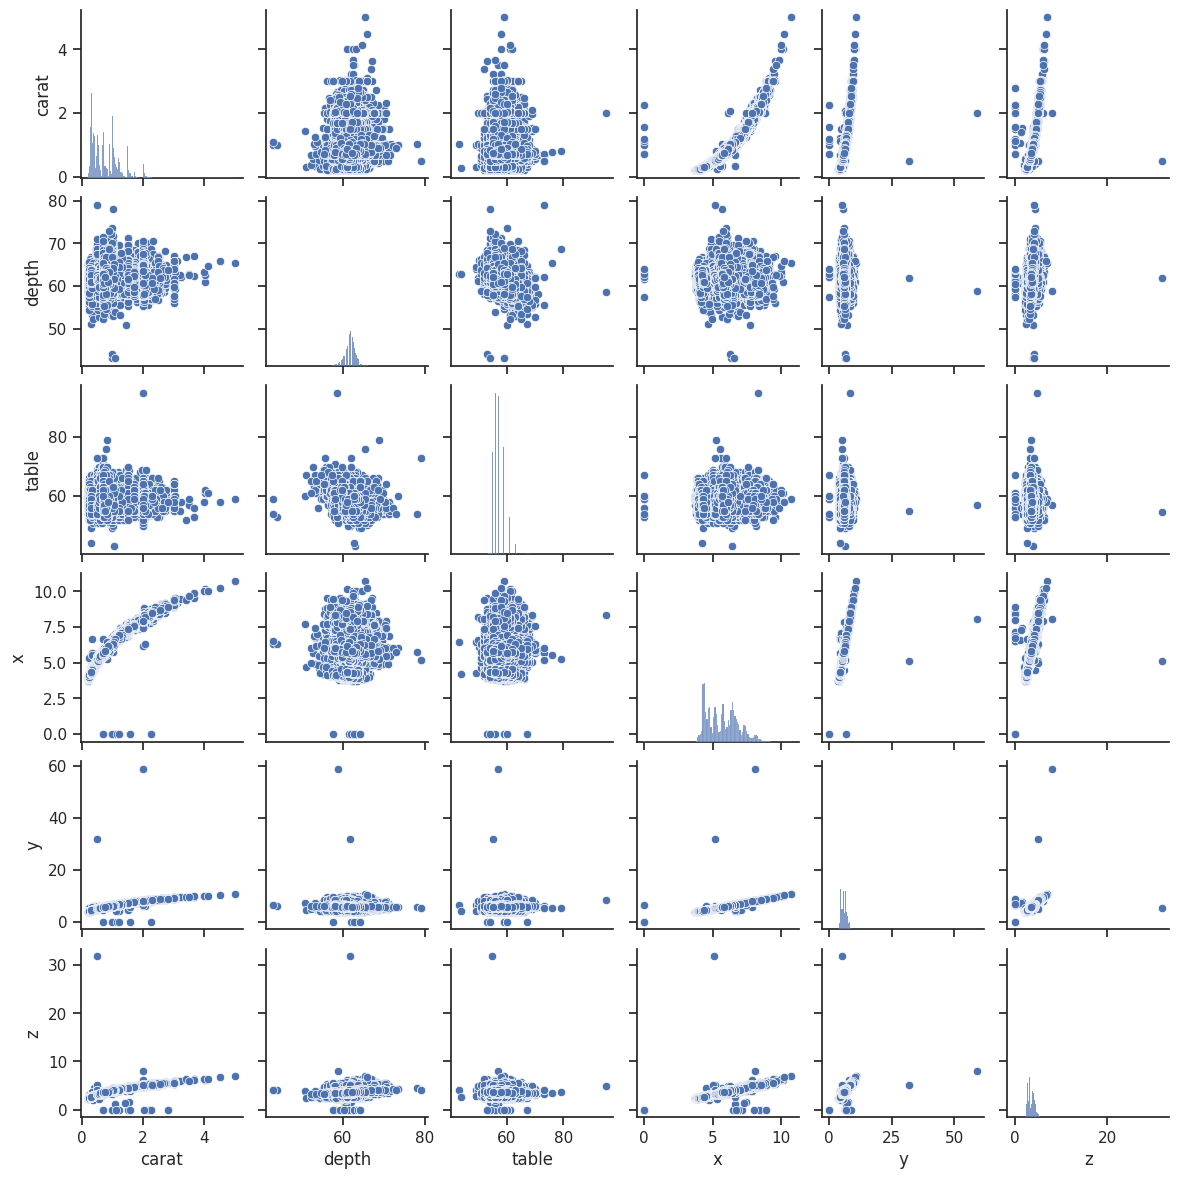

In [45]:
# Daftar numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Membuat scatter plot untuk setiap pasangan fitur
sns.set(style="ticks")
sns.pairplot(df[numerical_features], height=2)
plt.show()

<ipython-input-46-991cb9dc3171>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


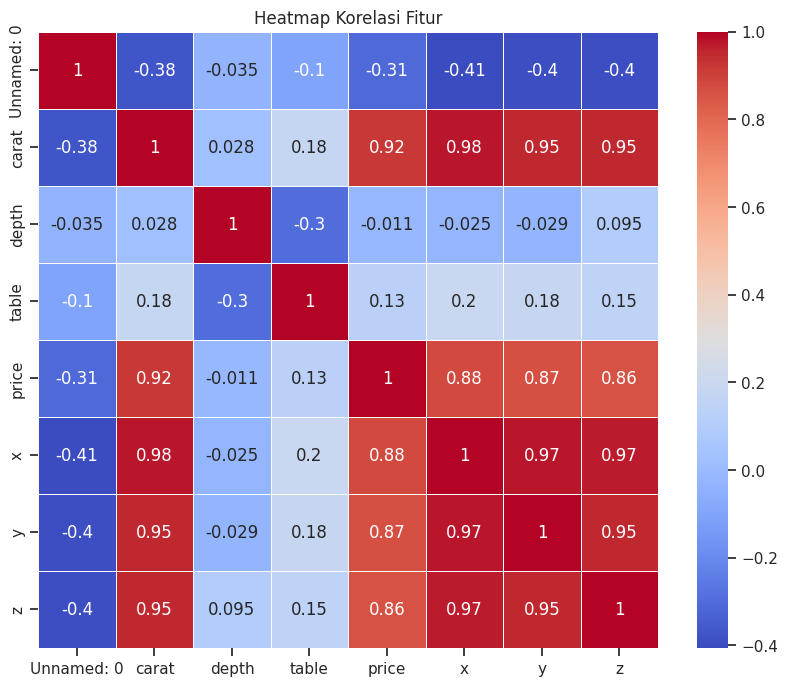

In [46]:
# Membuat matriks korelasi antara fitur-fitur
corr_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur')
plt.show()

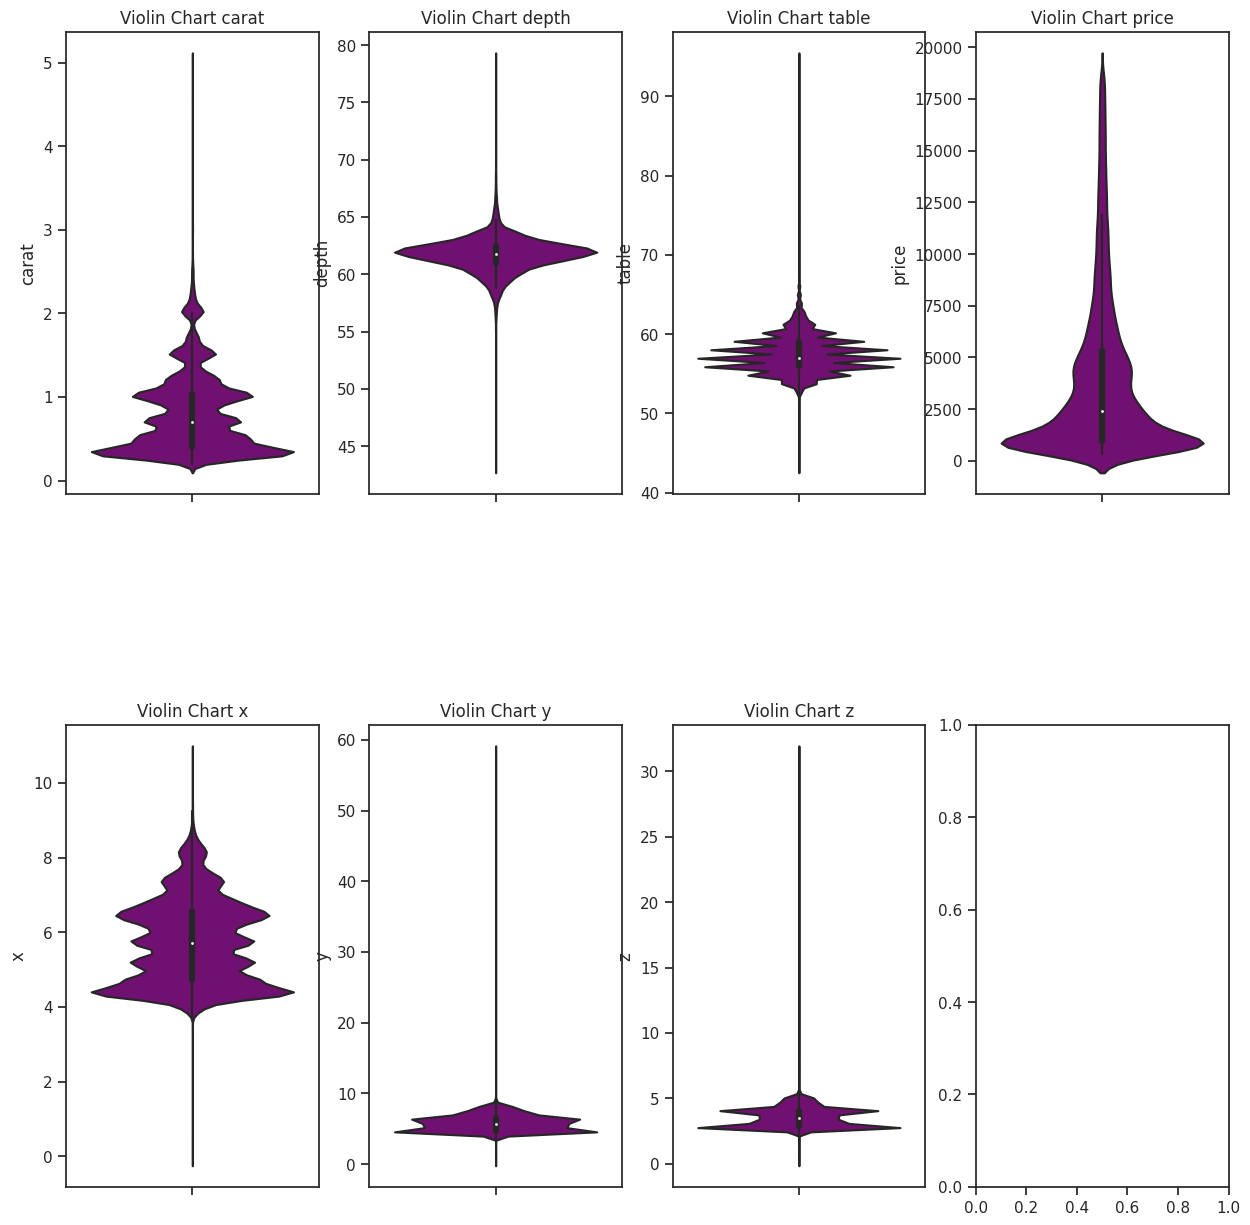

In [62]:
# Daftar fitur
fitur = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Membuat subplot dengan 4 baris dan 2 kolom
fig, axes = plt.subplots(2, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(fitur):
    row, col = divmod(i, 4)
    ax = axes[row, col]

    # Membuat violin chart dengan orientasi vertikal
    sns.violinplot(y=df[feature], ax=ax, color="purple")

    ax.set_title(f'Violin Chart {feature}')
    ax.set_ylabel(feature)
    ax.set_xlabel("")

plt.show()